In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Billboard%20%22The%20Hot%20100%22%20Songs/charts.csv")

In [6]:
data.head()

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
0,1,Butter,BTS,1.0,1,7,2021-07-17
1,2,Good 4 U,Olivia Rodrigo,2.0,1,8,2021-07-17
2,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,40,2021-07-17
3,4,Kiss Me More,Doja Cat Featuring SZA,3.0,3,13,2021-07-17
4,5,Montero (Call Me By Your Name),Lil Nas X,8.0,1,15,2021-07-17


In [7]:
data.shape

(328487, 7)

In [8]:
data.describe(include="all")

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
count,328487.000000,328487,328487,296422.000000,328487.000000,328487.000000,328487
unique,NaN,24436,10100,NaN,NaN,NaN,3285
top,NaN,Stay,Taylor Swift,NaN,NaN,NaN,2011-07-09
freq,NaN,208,1022,NaN,NaN,NaN,100
mean,50.500933,NaN,NaN,47.601197,41.007154,9.152472,NaN
std,28.866094,NaN,NaN,28.056956,29.349247,7.596439,NaN
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,26.000000,NaN,NaN,23.000000,14.000000,4.000000,NaN
50%,51.000000,NaN,NaN,47.000000,38.000000,7.000000,NaN
75%,76.000000,NaN,NaN,72.000000,65.000000,13.000000,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328487 entries, 0 to 328486
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rank            328487 non-null  int64  
 1   song            328487 non-null  object 
 2   artist          328487 non-null  object 
 3   last-week       296422 non-null  float64
 4   peak-rank       328487 non-null  int64  
 5   weeks-on-board  328487 non-null  int64  
 6   date            328487 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 17.5+ MB


In [10]:
data.date = pd.to_datetime(data.date)

In [12]:
data['Year'] = pd.Series(val.year for val in data['date'])

In [14]:
data['Month'] = pd.Series(val.month for val in data['date'])

In [15]:
data['last-week'] = np.where(data['last-week'].isnull(),0,data['last-week'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328487 entries, 0 to 328486
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   rank            328487 non-null  int64         
 1   song            328487 non-null  object        
 2   artist          328487 non-null  object        
 3   last-week       328487 non-null  float64       
 4   peak-rank       328487 non-null  int64         
 5   weeks-on-board  328487 non-null  int64         
 6   date            328487 non-null  datetime64[ns]
 7   Year            328487 non-null  int64         
 8   Month           328487 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 22.6+ MB


In [17]:
data['last-week'].value_counts()

0.0      32065
5.0       3285
1.0       3283
6.0       3283
7.0       3283
         ...  
96.0      1939
97.0      1754
98.0      1699
99.0      1538
100.0     1378
Name: last-week, Length: 101, dtype: int64

In [18]:
data.loc[data['last-week']==0,'song']

13                          Am I The Only One
48                               Wasting Time
72                                   Renegade
80                                Cry No More
81                                    Essence
                         ...                 
328482                          Over And Over
328483                       I Believe In You
328484                        Little Serenade
328485    I'll Get By (As Long As I Have You)
328486                                   Judy
Name: song, Length: 32065, dtype: object

In [19]:
data['artist'].value_counts()[:50]

Taylor Swift                          1022
Elton John                             889
Madonna                                857
Kenny Chesney                          758
Drake                                  751
Tim McGraw                             731
Keith Urban                            673
Stevie Wonder                          659
Rod Stewart                            657
Mariah Carey                           621
Michael Jackson                        611
Chicago                                607
Rascal Flatts                          604
Billy Joel                             588
The Beatles                            585
The Rolling Stones                     585
Aretha Franklin                        569
Rihanna                                566
Jason Aldean                           566
P!nk                                   563
Whitney Houston                        561
Brad Paisley                           559
Neil Diamond                           553
George Stra

In [21]:
data.groupby('artist').max()[['peak-rank','song']].sort_values(by='peak-rank')

,peak-rank,song
artist,,
"DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne",1,I'm The One
Travis Scott Featuring Young Thug & M.I.A.,1,Franchise
The Weeknd & Ariana Grande,1,Save Your Tears
Puff Daddy & Faith Evans Featuring 112,1,I'll Be Missing You
6ix9ine & Nicki Minaj,1,Trollz
...,...,...
The Womenfolk,100,Little Boxes
Jefferson Airplane,100,White Rabbit
Crime Mob Featuring Lil Scrappy,100,Rock Yo Hips


In [22]:
data.sort_values(by='weeks-on-board',ascending=False).iloc[:25,2:7]

,artist,last-week,peak-rank,weeks-on-board,date
37548,Imagine Dragons,48.0,3,87,2014-05-10
37647,Imagine Dragons,42.0,3,86,2014-05-03
37741,Imagine Dragons,39.0,3,85,2014-04-26
37838,Imagine Dragons,37.0,3,84,2014-04-19
37936,Imagine Dragons,33.0,3,83,2014-04-12
14,The Weeknd,18.0,1,83,2021-07-17
117,The Weeknd,15.0,1,82,2021-07-10
38032,Imagine Dragons,33.0,3,82,2014-04-05
38132,Imagine Dragons,31.0,3,81,2014-03-29
214,The Weeknd,17.0,1,81,2021-07-03


<AxesSubplot:xlabel='Year', ylabel='count'>

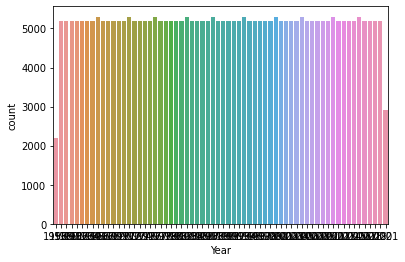

In [23]:
sns.countplot(data['Year'])